In [110]:
import cv2
import math
import scipy.fft as fft
import matplotlib.pyplot as plt
import numpy as np
from functions import *
plt.style.use(plt.style.available[5])

# 4.1. Fourier transform

4.1.1. For each filter given below, compute its Fourier transform, and illustrate its magnitude response. Determine what 
is its function (smoothing, edge enhancement or edge detection) based on the filter coefficients as well as its 
frequency response. For each filter, determine whether it is separable? If yes, compute the FT separately and 
explain the function of each 1D filter. If not, compute the FT directly. (Test on grayscale Lena Image).

𝑎)
1
16 [
1 2 1
2 4 2
1 2 1
]   
𝑏) [
−1 −1 −1
−1 8 −1
−1 −1 −1
]   
𝑐) [
0 −1 0
−1 5 −1
0 −1 0
]


4.1.2. Perform 2D DFT on grayscale Lena, Barbara, F16, and Baboon images. Display the magnitude of the DFT image 
with and without shifting and with and without logarithmic. Display and discuss the results. Also, examine in 
which frequency range the DFT coefficients have large magnitudes and explain why? 

# 4.2. Filtering

4.2.1. *Use DFT function to compute the linear convolution of an image 𝐹(𝑚, 𝑛) with a filter 𝐻(𝑚, 𝑛). Let the convolved 
image be denoted by 𝑌(𝑚, 𝑛). Firstly, suppose the image size is 256 × 256 and the filter size is 11 × 11; What is 
the required size of the DFT to obtain the convolution of these two? Explain the exact steps to obtain the 
convolution result. Secondly, suppose we use a 256 × 256 point DFT algorithm for 𝐹(𝑚, 𝑛) and 𝐻(𝑚, 𝑛), and obtain 
𝑍(𝑚, 𝑛) as 𝑍 = 𝐼𝐷𝐹𝑇 (𝐷𝐹𝑇(𝑋).∗ 𝐷𝐹𝑇(𝐻)). The DFT and IDFT in this equation are both 256 × 256 points. For what 
values of (𝑚, 𝑛) does 𝑍(𝑚, 𝑛) equal 𝑌(𝑚, 𝑛)?

1280


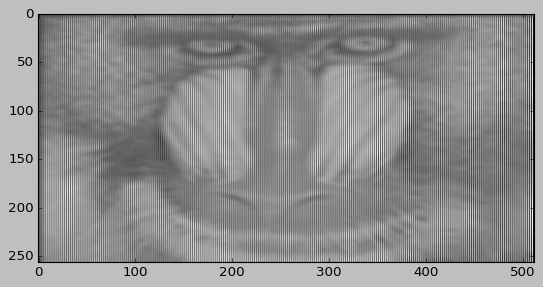

In [114]:
f_size = 5

lcm = math.lcm(256,f_size)
print(lcm)


baboon = cv2.imread('Baboon.bmp',cv2.IMREAD_GRAYSCALE)
baboon = cv2.resize(baboon,(256,256),interpolation=cv2.INTER_AREA)

plt.imshow(baboon ,cmap='gray')

baboon_pad = np.pad(baboon,(0,lcm-baboon.shape[0]),'constant',constant_values=0 )

filter = np.full((f_size,f_size),1/(f_size*f_size))

filter_pad = np.pad(filter,(0,lcm-filter.shape[0]),'constant',constant_values=0 )

bab_dft = np.fft.fft2(baboon_pad)

filter_dft = np.fft.fft2(filter_pad)

convolved = np.multiply(bab_dft,filter_dft)

idft = np.fft.irfft2(convolved)

baboon1 = idft.copy()[0:256,0:512]

# baboon1 = cv2.resize(baboon1,(256,256),interpolation=cv2.INTER_AREA)

plt.imshow(baboon1,cmap='gray')
plt.imsave('baboon1.jpg',baboon1,cmap='gray')



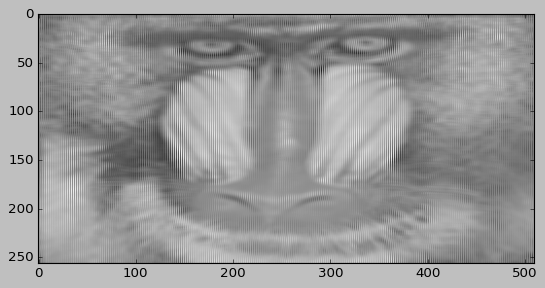

In [112]:
f_size = 5

lcm = 256

baboon = cv2.imread('Baboon.bmp',cv2.IMREAD_GRAYSCALE)
baboon = cv2.resize(baboon,(256,256),interpolation=cv2.INTER_AREA)

filter = np.full((f_size,f_size),1/(f_size*f_size))

filter_pad = np.pad(filter,(0,lcm-filter.shape[0]),'constant',constant_values=0 )

bab_dft = np.fft.fft2(baboon)

filter_dft = np.fft.fft2(filter_pad)

convolved = np.multiply(bab_dft,filter_dft)

idft = np.fft.irfft2(convolved)

# baboon2 = idft.copy()[0:256,0:512]

# baboon2 = cv2.resize(baboon2,(256,256),interpolation=cv2.INTER_AREA)

plt.imshow(idft,cmap='gray')
plt.imsave('baboon2.jpg',idft,cmap='gray')



4.2.2. Write a program that filters grayscale Barbara image by zeroing out certain DFT coefficients.
The program consists of three steps:
1. Performing 2D DFT.
2. Zeroing out the coefficients at certain frequencies (see below).
3. Performing inverse DFT to get back a filtered image. 
    
Note: Truncate or scale the image properly such that its range is between 0 and 255.
For part 2, try the following two types of filters:  
    a. Let 𝐹(𝑘, 𝑙) = 0 for 𝑇𝑁 < {𝑘, 𝑙} < (1 − 𝑇 )𝑁, 𝑇 = 1/4, 1/8 (low-pass filtering).      
    b. Let 𝐹(𝑘, 𝑙) = 0 for the following regions :      
    
    i. 0 ≤ {𝑘 𝑎𝑛𝑑 𝑙} ≤ 𝑇𝑁;
    ii. 0 <= 𝑘 <= 𝑇𝑁, 𝑎𝑛𝑑 (1 − 𝑇)𝑁 ≤ 𝑙 ≤ 𝑁 − 1;
    iii. (1 − 𝑇)𝑁 ≤ 𝑘 ≤ 𝑁 − 1 𝑎𝑛𝑑 0 ≤ {𝑙} ≤ 𝑇𝑁; 
    iv. (1 − 𝑇)𝑁 ≤ 𝑘 𝑎𝑛𝑑 𝑙 ≤ 𝑁 − 1; 𝑇 = 1/4, 1/8

Display and compare the original and processed images. Discuss the function of the two types of filters.
Note: you can use fft2, ifft2, fftshift, and rgb2gray functions for problem 4
